In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from itertools import combinations

import ast
import re

pd.options.display.float_format = '{:.0f}'.format
np.set_printoptions(suppress=True)

In [31]:
users = pd.read_csv('users.csv')
tweets = pd.read_csv('tweets.csv')

In [32]:
tweets.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,2532611755,kathiemrr,1488207240000,2017-02-27 14:54:00,NaN,NaN,NaN,#ThingsDoneByMistake kissing auntie in the lips,836227891897651200,NaN,"[""ThingsDoneByMistake""]",[],POSTED,[],NaN,NaN
1,2531159968,traceyhappymom,1471272620000,2016-08-15 14:50:20,NaN,NaN,NaN,RT @mc_derpin: #TheOlderWeGet the more pessimi...,765198948239810560,NaN,"[""TheOlderWeGet""]",[],POSTED,[],NaN,NaN
2,NaN,evewebster373,1435701369000,2015-06-30 21:56:09,NaN,NaN,NaN,RT @dmataconis: Ready To Feel Like A Failure? ...,616002306572746752,NaN,[],[],POSTED,[],NaN,NaN
3,4840551713,blacktolive,1474013088000,2016-09-16 08:04:48,18,False,17,Amen! #blacklivesmatter https://t.co/wGffaOqgzl,776693302926147584,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Blacklivesmatter""]",[],POSTED,[],NaN,NaN
4,1694026190,jacquelinisbest,1474227985000,2016-09-18 19:46:25,0,False,0,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,777594647875059712,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""WakeUpAmerica""]","[""http://ln.is/twitchy.com/loriz-31/3yafU""]",POSTED,"[""nahbabynah""]",777591478206029824,NaN


In [33]:
tweets.describe()

,user_id,created_at,retweet_count,favorite_count,tweet_id,retweeted_status_id,in_reply_to_status_id
count,195386,203430,58052,58052,201137,39649,559
mean,14037899782918196,1473182407243,40,36,773519197747248512,780882491186044544,771904681354557568
std,101744367837954368,16987118106,291,270,71066656550556232,20347054331072404,19938796212002612
min,38875764,1405361095000,0,0,488745973032964096,76755897329790976,610838591242137600
25%,1671234620,1471270406000,0,0,765478125798952960,776883356210462720,762730705879201792
50%,1859674386,1476888528500,0,0,788757588942938112,783845125206179840,773584728276475904
75%,2590038478,1483196268500,0,0,815353161556852736,789272543026933760,781426945494038528
max,789266125485998080,1506416732000,20494,26655,912604038692261888,892702560074833920,800996968994521088


In [34]:
tweets.loc[tweets['user_key']=='ten_gop']

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
38,4224729994,ten_gop,1473020379000,2016-09-04 20:19:39,126,False,65,#HowToConfuseAMillennial Let them WATCH what M...,772529580833959936,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""HowToConfuseAMillennial""]",[],POSTED,[],NaN,NaN
216,4224729994,ten_gop,1478734076000,2016-11-09 23:27:56,567,False,518,Ed Klein: Hillary couldn't stop crying and bla...,796494563070320640,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,[],NaN,NaN
303,4224729994,ten_gop,1470939242000,2016-08-11 18:14:02,1,False,1,@HillaryClinton You belong to PRISON!,763800657719545856,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,"[""hillaryclinton""]",NaN,763800602837123072
447,4224729994,ten_gop,1477429184000,2016-10-25 20:59:44,22,False,21,Watch: black Trump supporter explains why she ...,791021447573540864,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""TrumpAHorrorMovie""]",[],POSTED,[],NaN,NaN
560,4224729994,ten_gop,1471620305000,2016-08-19 15:25:05,359,False,338,While Obama is busy playing golf our next pres...,766657245840941056,"<a href=""https://about.twitter.com/products/tw...","[""Louisiana""]",[],POSTED,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203042,4224729994,ten_gop,1471732027000,2016-08-20 22:27:07,39,False,20,Typical SJW👇 See how much love &amp; care does...,767125841713082368,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN
203110,4224729994,ten_gop,1477258381000,2016-10-23 21:33:01,110,False,103,".@JudgeNap: ""This Justice Department has the w...",790305047854788608,"<a href=""https://about.twitter.com/products/tw...",[],"[""https://twitter.com/i/web/status/79030504785...",POSTED,"[""judgenap""]",NaN,NaN
203164,4224729994,ten_gop,1474146669000,2016-09-17 21:11:09,1249,False,977,BLACK REPUBLICAN fired from radio station afte...,777253584689823744,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN
203195,4224729994,ten_gop,1471923603000,2016-08-23 03:40:03,137,False,113,This is the real goal of EVERY Muslim! \nThey ...,767929369717125120,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN


In [35]:
def classify_tweet(row):
    if pd.notna(row['retweeted_status_id']):
        return 'retweet'
    elif pd.notna(row['in_reply_to_status_id']):
        return 'reply'
    else:
        return 'original'


tweets['tweet_type'] = tweets.apply(classify_tweet, axis=1)

In [36]:
tweets.loc[tweets['user_key']=='ten_gop']

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tweet_type
38,4224729994,ten_gop,1473020379000,2016-09-04 20:19:39,126,False,65,#HowToConfuseAMillennial Let them WATCH what M...,772529580833959936,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""HowToConfuseAMillennial""]",[],POSTED,[],NaN,NaN,original
216,4224729994,ten_gop,1478734076000,2016-11-09 23:27:56,567,False,518,Ed Klein: Hillary couldn't stop crying and bla...,796494563070320640,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,[],NaN,NaN,original
303,4224729994,ten_gop,1470939242000,2016-08-11 18:14:02,1,False,1,@HillaryClinton You belong to PRISON!,763800657719545856,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,"[""hillaryclinton""]",NaN,763800602837123072,reply
447,4224729994,ten_gop,1477429184000,2016-10-25 20:59:44,22,False,21,Watch: black Trump supporter explains why she ...,791021447573540864,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""TrumpAHorrorMovie""]",[],POSTED,[],NaN,NaN,original
560,4224729994,ten_gop,1471620305000,2016-08-19 15:25:05,359,False,338,While Obama is busy playing golf our next pres...,766657245840941056,"<a href=""https://about.twitter.com/products/tw...","[""Louisiana""]",[],POSTED,[],NaN,NaN,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203042,4224729994,ten_gop,1471732027000,2016-08-20 22:27:07,39,False,20,Typical SJW👇 See how much love &amp; care does...,767125841713082368,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN,original
203110,4224729994,ten_gop,1477258381000,2016-10-23 21:33:01,110,False,103,".@JudgeNap: ""This Justice Department has the w...",790305047854788608,"<a href=""https://about.twitter.com/products/tw...",[],"[""https://twitter.com/i/web/status/79030504785...",POSTED,"[""judgenap""]",NaN,NaN,original
203164,4224729994,ten_gop,1474146669000,2016-09-17 21:11:09,1249,False,977,BLACK REPUBLICAN fired from radio station afte...,777253584689823744,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN,original
203195,4224729994,ten_gop,1471923603000,2016-08-23 03:40:03,137,False,113,This is the real goal of EVERY Muslim! \nThey ...,767929369717125120,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN,original


In [37]:
tweets['tweet_type'].value_counts()

tweet_type
original    163243
retweet      39649
reply          559
Name: count, dtype: int64

In [38]:
tweets.loc[tweets['tweet_type']=='retweet']

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tweet_type
4,1694026190,jacquelinisbest,1474227985000,2016-09-18 19:46:25,0,False,0,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,777594647875059712,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""WakeUpAmerica""]","[""http://ln.is/twitchy.com/loriz-31/3yafU""]",POSTED,"[""nahbabynah""]",777591478206029824,NaN,retweet
6,1647045721,carriethornthon,1476133446000,2016-10-10 21:04:06,0,False,0,RT @ItsJustJaynie: @HillaryClinton The undecid...,785586729579196416,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,"[""itsjustjaynie"",""hillaryclinton"",""cnn""]",785326419509411840,NaN,retweet
12,2589353987,cassieweltch,1478535378000,2016-11-07 16:16:18,0,False,0,"RT @HillaryClinton: This one's for you, Hillar...",795661161282891776,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,"[""hillaryclinton""]",795463782671798272,NaN,retweet
13,1649967228,_nickluna_,1474291208000,2016-09-19 13:20:08,0,False,0,"RT @leonpui_: Hillary Clinton, Obama and the D...",777859822679158784,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[""http://freedomoutpost.com/2013/02/the-use-of...",POSTED,"[""leonpui_""]",777854524245446656,NaN,retweet
17,1660771422,garrettsimpson_,1476949095000,2016-10-20 07:38:15,0,False,0,RT @DMashak: #Debates Chris Wallace @FoxNewsSu...,789007810830831616,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""debates"",""debates""]","["""",""""]",POSTED,"[""dmashak"",""foxnewssunday""]",789004190756528128,NaN,retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203421,1649967228,_nickluna_,1476677945000,2016-10-17 04:19:05,0,False,0,RT @gerfingerpoken: Obama Snatched Iraq Defeat...,787870522931412992,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""pjnet""]","[""http://bit.ly/1RYGk9C""]",POSTED,"[""gerfingerpoken""]",787861396356681728,NaN,retweet
203424,1679279490,ameliebaldwin,1475234988000,2016-09-30 11:29:48,0,False,0,RT @NimbleNavgater: Liberal Logic\n-Trump brin...,781818322719563776,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,"[""nimblenavgater""]",781590393183834112,NaN,retweet
203431,1629828379,cassishere,1474059054000,2016-09-16 20:50:54,0,False,0,RT @wthisagigawatt: Haha Trump played CNN \n\n...,776886100962836480,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[""http://thehill.com/blogs/blog-briefing-room/...",POSTED,"[""wthisagigawatt""]",776825016642072576,NaN,retweet
203433,1671234620,hyddrox,1474146668000,2016-09-17 21:11:08,0,False,0,RT @RepublicanChick: My trumpster sister! Than...,777253577551147008,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""BasketOfAdorables"",""ClintonIsTheNewCWord"",""B...",[],POSTED,"[""realdonaldtrump"",""republicanchick""]",777237784826302464,NaN,retweet


In [39]:
tweets[tweets['retweeted_status_id']==796494563070320640]

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tweet_type


In [40]:
# Retweety
retweets = tweets[tweets['tweet_type'] == 'retweet'].copy()

# Kolumna z ID oryginalnego tweeta
retweets[['tweet_id', 'retweeted_status_id']]


,tweet_id,retweeted_status_id
4,777594647875059712,777591478206029824
6,785586729579196416,785326419509411840
12,795661161282891776,795463782671798272
13,777859822679158784,777854524245446656
17,789007810830831616,789004190756528128
...,...,...
203421,787870522931412992,787861396356681728
203424,781818322719563776,781590393183834112
203431,776886100962836480,776825016642072576
203433,777253577551147008,777237784826302464


In [41]:
retweets = retweets.merge(
    tweets[['tweet_id', 'user_id']], 
    left_on='retweeted_status_id', 
    right_on='tweet_id', 
    how='inner', 
    suffixes=('', '_original')
)



In [42]:
retweets

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tweet_type,tweet_id_original,user_id_original
0,4208754922,missourinewsus,1472251419000,2016-08-26 22:43:39,0,False,0,RT @Pamela_Moore13: People starting to wake up...,769304327345303552,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Miami""]",[],POSTED,"[""pamela_moore13""]",769300010093666304,NaN,retweet,769300010093666304,4272870988
1,4311371968,rightnpr,1473278309000,2016-09-07 19:58:29,0,False,0,RT @tpartynews: 💥💥💥Trump raises $5 mil in smal...,773611416347611136,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,"[""tpartynews""]",773604250635079680,NaN,retweet,773604250635079680,3990577513
2,3990577513,tpartynews,1474066747000,2016-09-16 22:59:07,0,False,0,"RT @TEN_GOP: Trump in #Miami: ""Take Guns from ...",776918367022317568,"<a href=""https://about.twitter.com/products/tw...","[""Miami"",""TrumpRally"",""birtherism""]",[],POSTED,"[""ten_gop""]",776917554996674560,NaN,retweet,776917554996674560,4224729994
3,1679279490,ameliebaldwin,1474067294000,2016-09-16 23:08:14,0,False,0,"RT @TEN_GOP: Trump in #Miami: ""Take Guns from ...",776920659989594112,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""TrumpRally"",""birtherism"",""Miami""]",[],POSTED,"[""ten_gop""]",776917554996674560,NaN,retweet,776917554996674560,4224729994
4,4311371968,rightnpr,1474066747000,2016-09-16 22:59:07,0,False,0,"RT @TEN_GOP: Trump in #Miami: ""Take Guns from ...",776918366900609024,"<a href=""https://about.twitter.com/products/tw...","[""TrumpRally"",""birtherism"",""Miami""]",[],POSTED,"[""ten_gop""]",776917554996674560,NaN,retweet,776917554996674560,4224729994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,1727482238,melvinsroberts,1482763742000,2016-12-26 14:49:02,NaN,NaN,NaN,RT @GiselleEvns: #Christmasaftermath getting i...,813396206101692416,NaN,"[""ChristmasAftermath""]",[],POSTED,[],813392641316573184,NaN,retweet,813392641316573184,2882013788
2624,1658202894,laurabaeley,1457805099000,2016-03-12 17:51:39,NaN,NaN,NaN,RT @EvaGreen69: Just say ‘no’! #NoCyberCensors...,708712070527586304,NaN,"[""NoCyberCensorship""]",[],POSTED,[],708710050403979264,NaN,retweet,708710050403979264,2533653547
2625,2531159968,traceyhappymom,1476887738000,2016-10-19 14:35:38,NaN,NaN,NaN,RT @BuckFradley: Grabbing pussy or grabbing di...,788750460664549376,NaN,"[""RejectedDebateTopics""]",[],POSTED,[],788755389017755648,NaN,retweet,788755389017755648,2532611755
2626,1660771422,garrettsimpson_,1457806494000,2016-03-12 18:14:54,NaN,NaN,NaN,RT @DorothieBell: Say #NoCyberCensorship! 🚫⛔️,708717920327766016,NaN,"[""NoCyberCensorship""]",[],POSTED,[],708710213973577728,NaN,retweet,708710213973577728,1833223908


In [43]:
links = retweets[['user_id','user_id_original']]
G = nx.Graph()
G.nodes= links

In [44]:
###############################################################################

In [45]:
tweets.columns

Index(['user_id', 'user_key', 'created_at', 'created_str', 'retweet_count',
       'retweeted', 'favorite_count', 'text', 'tweet_id', 'source', 'hashtags',
       'expanded_urls', 'posted', 'mentions', 'retweeted_status_id',
       'in_reply_to_status_id', 'tweet_type'],
      dtype='object')

In [46]:
users.columns

Index(['id', 'location', 'name', 'followers_count', 'statuses_count',
       'time_zone', 'verified', 'lang', 'screen_name', 'description',
       'created_at', 'favourites_count', 'friends_count', 'listed_count'],
      dtype='object')

Węzły: 17
Krawędzie: 15


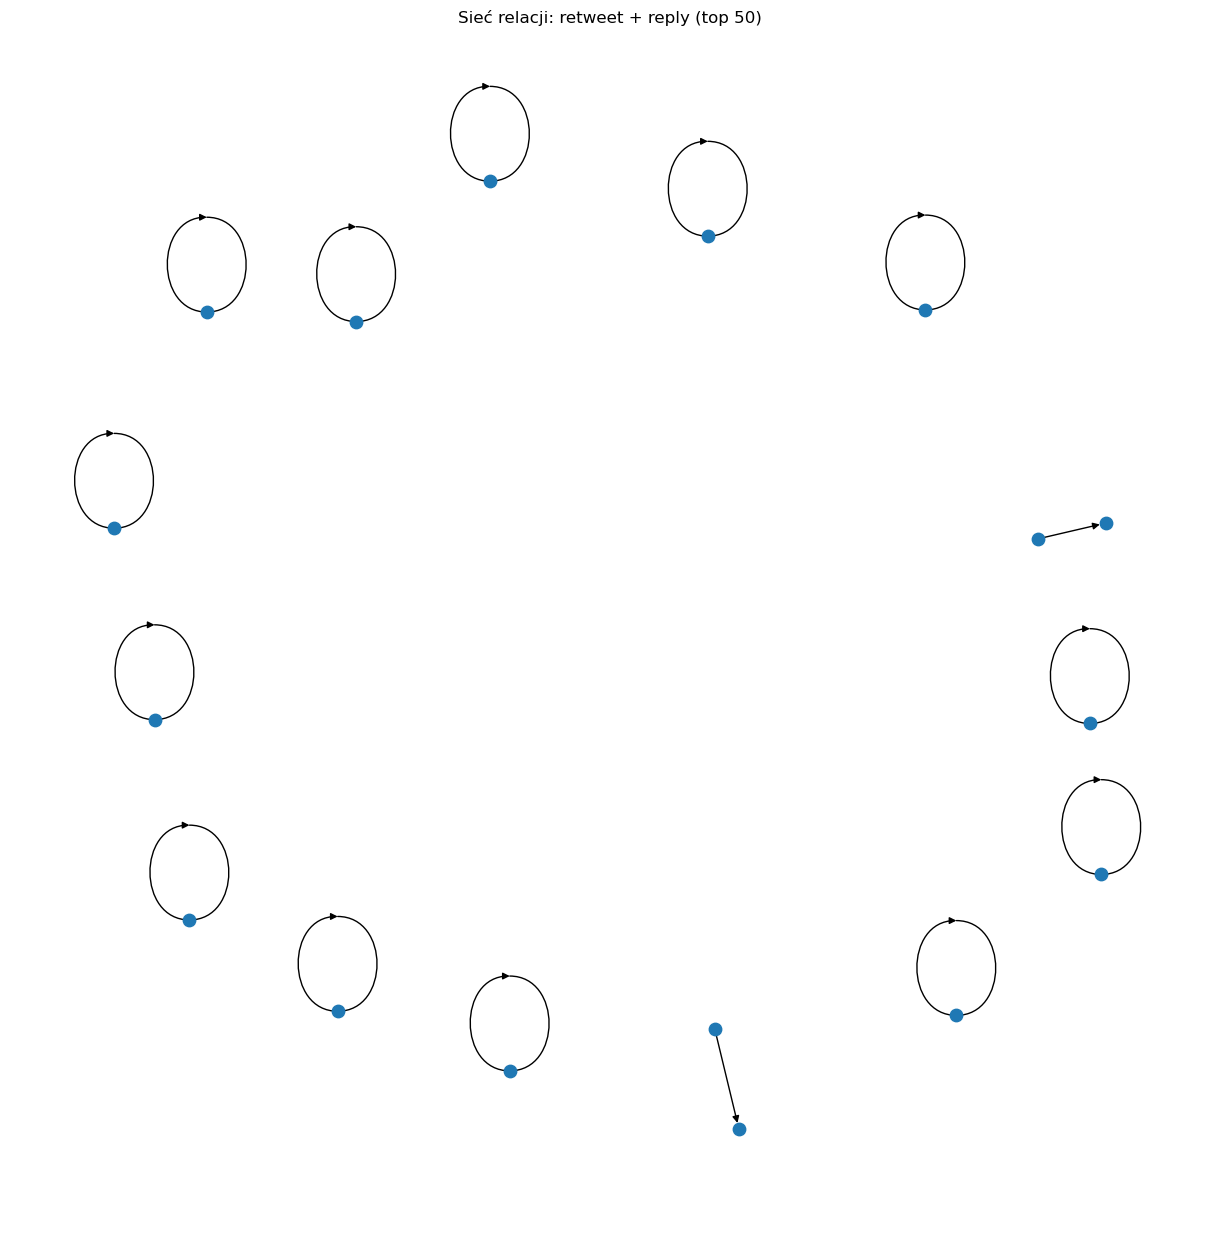

WarfareWW ( 2484642526.0 ): 2
todayinsyria ( 3899481526.0 ): 2
SCOTTGOHARD ( 100345056.0 ): 2
Jenn_Abrams ( 2882331822.0 ): 2
Luke_Jones13 ( 4209684039.0 ): 2
redlanews ( 4289431230.0 ): 2
RealTEN_GOP ( 4224912857.0 ): 2
USA_Gunslinger ( 4332740714.0 ): 2
Blk_Voice ( 4217244274.0 ): 2
BlackNewsOutlet ( 4301962823.0 ): 2


In [47]:
# tweet_id -> autor user_id
tweet_to_author = (
    tweets[["tweet_id", "user_id"]]
    .dropna()
    .drop_duplicates()
    .set_index("tweet_id")["user_id"]
    .to_dict()
)

# user_id -> screen_name (żeby ładniej opisać węzły)
user_to_name = (
    users[["id", "screen_name"]]
    .dropna()
    .drop_duplicates()
    .set_index("id")["screen_name"]
    .to_dict()
)

# =========================
# 2) Budowa grafu: RT + reply
# =========================

G = nx.DiGraph()

# retweet: user_id -> autor retweetowanego tweeta
rt_rows = tweets.loc[tweets["retweeted"] == True, ["user_id", "retweeted_status_id"]].dropna()
for u, rt_tid in rt_rows.itertuples(index=False):
    v = tweet_to_author.get(rt_tid)
    if v is not None:
        G.add_edge(u, v, relation="retweet")

# reply: user_id -> autor tweeta, na którego odpowiada
reply_rows = tweets.loc[tweets["in_reply_to_status_id"].notna(), ["user_id", "in_reply_to_status_id"]].dropna()
for u, rep_tid in reply_rows.itertuples(index=False):
    v = tweet_to_author.get(rep_tid)
    if v is not None:
        G.add_edge(u, v, relation="reply")

print("Węzły:", G.number_of_nodes())
print("Krawędzie:", G.number_of_edges())

# =========================
# 3) Top 50 i rysunek
# =========================

top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
top_nodes = [n for n, _ in top_nodes]
H = G.subgraph(top_nodes)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(H, seed=42)

nx.draw(
    H,
    pos,
    node_size=80,
    with_labels=False
)

plt.title("Sieć relacji: retweet + reply (top 50)")
plt.show()

# =========================
# 4) lista top kont po stopniu
# =========================

top10 = sorted(G.degree, key=lambda x: x[1], reverse=True)[:10]
for uid, deg in top10:
    name = user_to_name.get(uid, str(uid))
    print(name, "(", uid, "):", deg)


Węzły: 17
Krawędzie: 15
Po usunięciu self-loopów
Węzły: 17
Krawędzie: 2


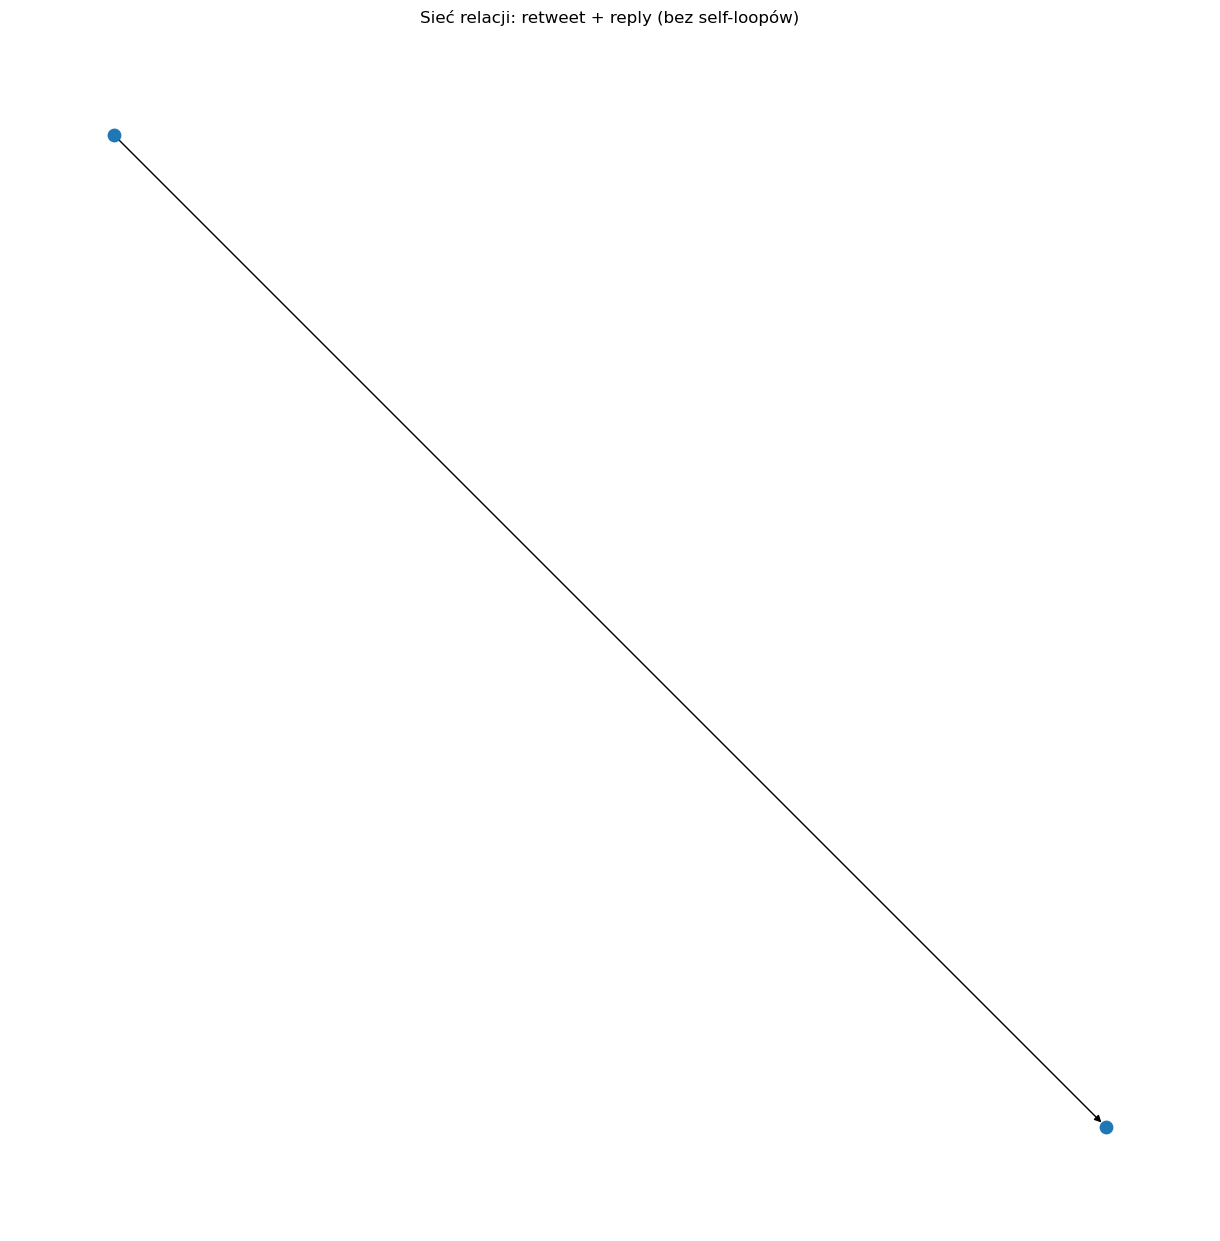

MarissaImStrong (1681425248): 1
JeffreyKahunas (1623180199): 1


In [48]:
def to_int64(series):
    # bezpieczna konwersja: float/str -> Int64 (nullable)
    return pd.to_numeric(series, errors="coerce").astype("Int64")

tweets["tweet_id"] = to_int64(tweets["tweet_id"])
tweets["user_id"] = to_int64(tweets["user_id"])
tweets["retweeted_status_id"] = to_int64(tweets["retweeted_status_id"])
tweets["in_reply_to_status_id"] = to_int64(tweets["in_reply_to_status_id"])

users["id"] = to_int64(users["id"])

# =========================
# 2) Mapowanie tweet_id -> autor user_id
# =========================

tweet_to_author = (
    tweets[["tweet_id", "user_id"]]
    .dropna()
    .drop_duplicates()
    .set_index("tweet_id")["user_id"]
    .to_dict()
)

# (opcjonalnie) user_id -> screen_name do wypisywania top kont
user_to_name = (
    users[["id", "screen_name"]]
    .dropna()
    .drop_duplicates()
    .set_index("id")["screen_name"]
    .to_dict()
)

# =========================
# 3) Graf: retweet + reply
# =========================

G = nx.DiGraph()

# retweet: u -> autor retweetowanego tweeta
rt_rows = tweets.loc[tweets["retweeted"] == True, ["user_id", "retweeted_status_id"]].dropna()
for u, rt_tid in rt_rows.itertuples(index=False):
    v = tweet_to_author.get(rt_tid)
    if v is not None:
        G.add_edge(int(u), int(v), relation="retweet")

# reply: u -> autor tweeta, na którego odpowiada
rep_rows = tweets.loc[tweets["in_reply_to_status_id"].notna(), ["user_id", "in_reply_to_status_id"]].dropna()
for u, rep_tid in rep_rows.itertuples(index=False):
    v = tweet_to_author.get(rep_tid)
    if v is not None:
        G.add_edge(int(u), int(v), relation="reply")

print("Węzły:", G.number_of_nodes())
print("Krawędzie:", G.number_of_edges())

# usuń self-loopy (kółka)
G.remove_edges_from(nx.selfloop_edges(G))

print("Po usunięciu self-loopów")
print("Węzły:", G.number_of_nodes())
print("Krawędzie:", G.number_of_edges())

# =========================
# 4) wizualizacja: największy komponent
# =========================

if G.number_of_nodes() > 0 and G.number_of_edges() > 0:
    # największy słabo spójny komponent
    comp = max(nx.weakly_connected_components(G), key=len)
    H = G.subgraph(comp).copy()

    # jak komponent jest duży, ogranicz do top 50
    if H.number_of_nodes() > 50:
        top_nodes = sorted(H.degree, key=lambda x: x[1], reverse=True)[:50]
        top_nodes = [n for n, _ in top_nodes]
        H = H.subgraph(top_nodes).copy()

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(H, seed=42)
    nx.draw(H, pos, node_size=80, with_labels=False)
    plt.title("Sieć relacji: retweet + reply (bez self-loopów)")
    plt.show()

    # top konta
    top10 = sorted(H.degree, key=lambda x: x[1], reverse=True)[:10]
    for uid, deg in top10:
        print(f"{user_to_name.get(uid, uid)} ({uid}): {deg}")
else:
    print("Za mało dopasowań tweet_id -> (retweeted/in_reply_to).")


Węzły: 32
Krawędzie: 29


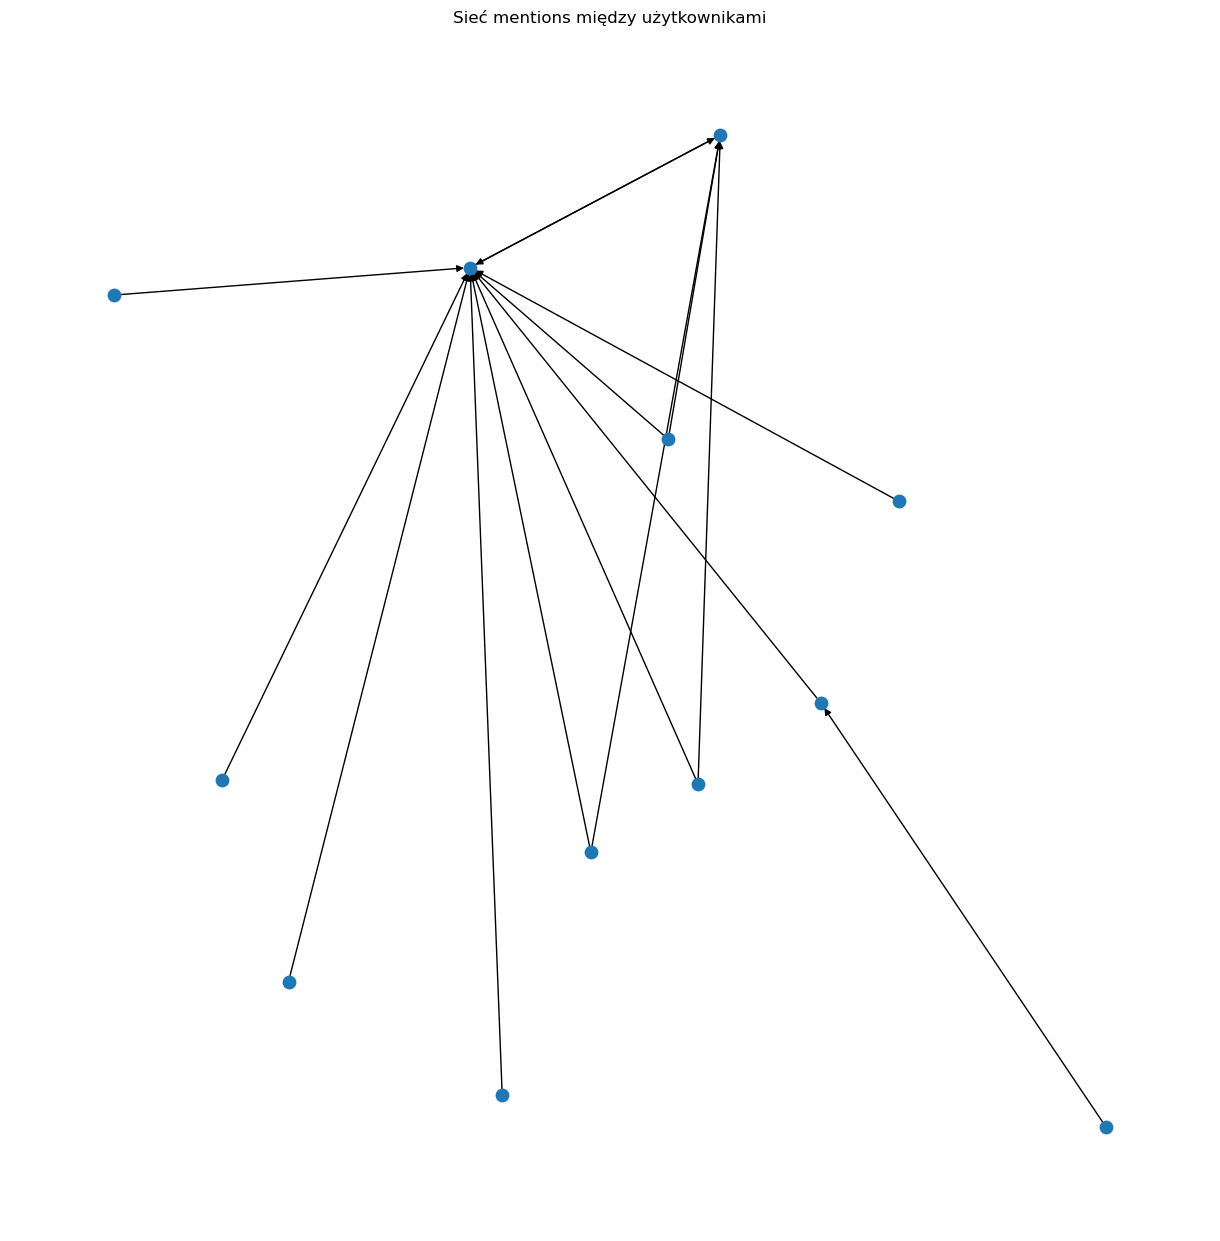

In [49]:
# mapowanie screen_name -> user_id
name_to_id = (
    users[["id", "screen_name"]]
    .dropna()
    .set_index("screen_name")["id"]
    .to_dict()
)

G = nx.DiGraph()

def parse_mentions(x):
    if pd.isna(x):
        return []
    s = str(x)
    # próbujemy listę
    if s.startswith("["):
        try:
            return ast.literal_eval(s)
        except:
            pass
    # fallback: @nicki z tekstu
    return re.findall(r"@([A-Za-z0-9_]{1,30})", s)

for _, row in tweets.iterrows():
    src = row["user_id"]
    for m in parse_mentions(row["mentions"]):
        uid = name_to_id.get(m)
        if uid is not None and uid != src:
            G.add_edge(src, uid)

print("Węzły:", G.number_of_nodes())
print("Krawędzie:", G.number_of_edges())

# największy komponent
comp = max(nx.weakly_connected_components(G), key=len)
H = G.subgraph(comp)

# top 50
if H.number_of_nodes() > 50:
    top = sorted(H.degree, key=lambda x: x[1], reverse=True)[:50]
    H = H.subgraph([n for n, _ in top])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(H, seed=42)
nx.draw(H, pos, node_size=80, with_labels=False)
plt.title("Sieć mentions między użytkownikami")
plt.show()

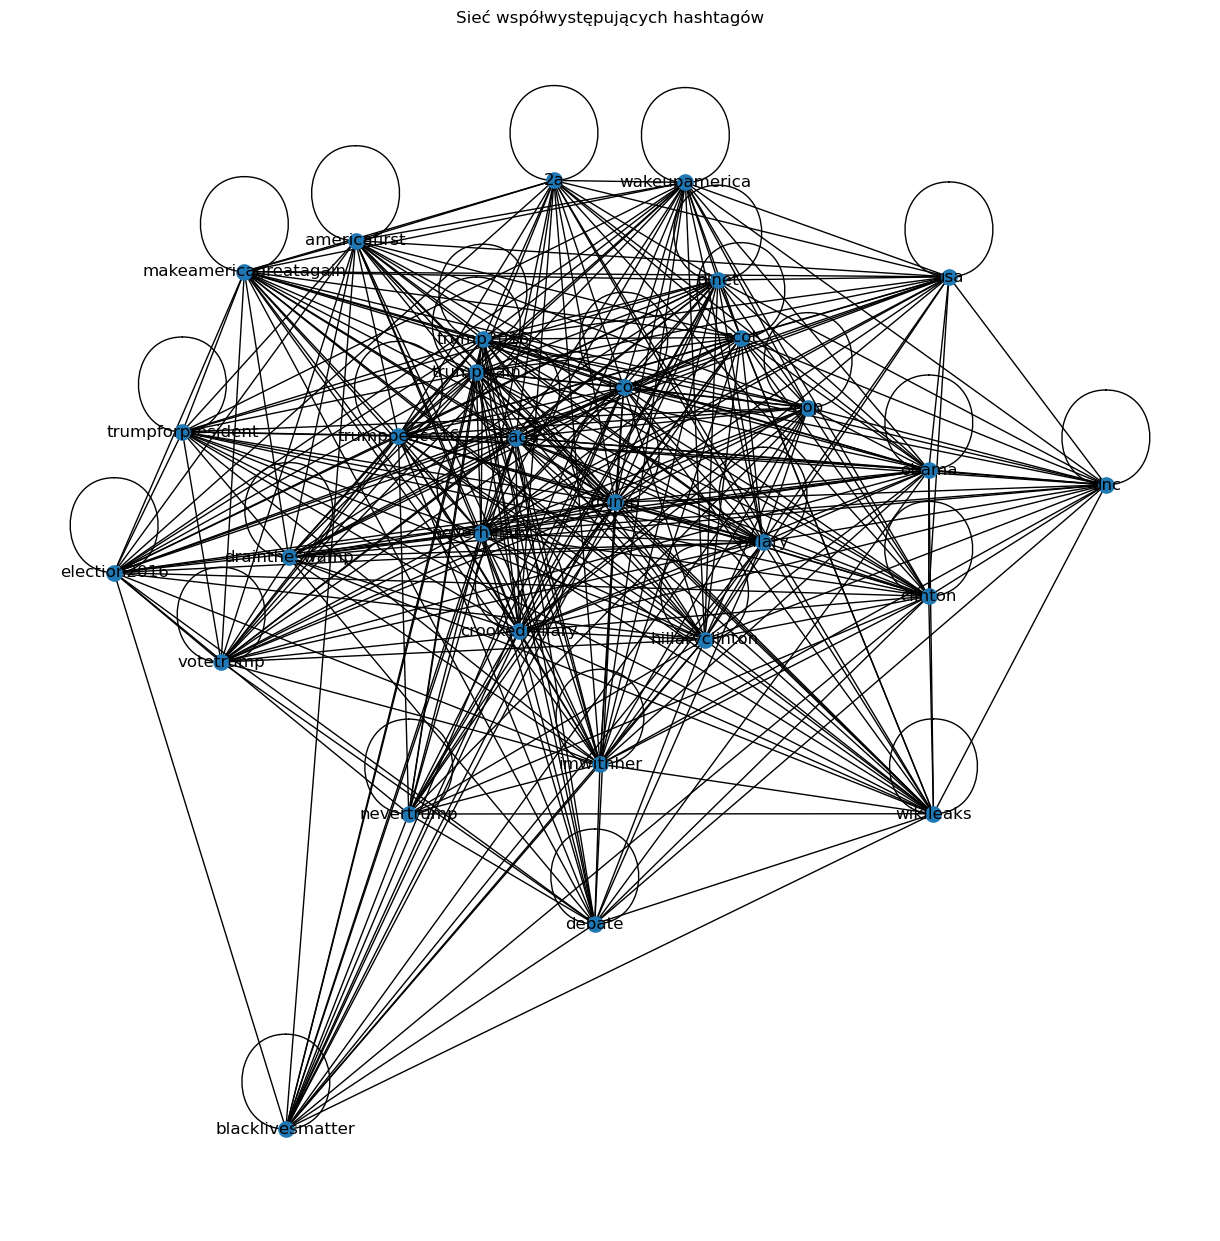

In [50]:
HG = nx.Graph()

for h in tweets["hashtags"].dropna():
    try:
        tags = ast.literal_eval(h)
        tags = [t.lower() for t in tags]
        for a, b in combinations(tags, 2):
            if HG.has_edge(a, b):
                HG[a][b]["weight"] += 1
            else:
                HG.add_edge(a, b, weight=1)
    except:
        pass

# top 30 hashtagów
top_tags = sorted(HG.degree, key=lambda x: x[1], reverse=True)[:30]
HT = HG.subgraph([n for n, _ in top_tags])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(HT, seed=42)
nx.draw(HT, pos, node_size=120, with_labels=True)
plt.title("Sieć współwystępujących hashtagów")
plt.show()